## 最大化 $f(x,y)=x^2y$，并且满足$x^2+y^2=16$

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [2]:
f = lambda X: X[0]**2 * X[1] # 目标函数
g = lambda X: X[0]**2 + X[1]**2 - 16  # 限制函数

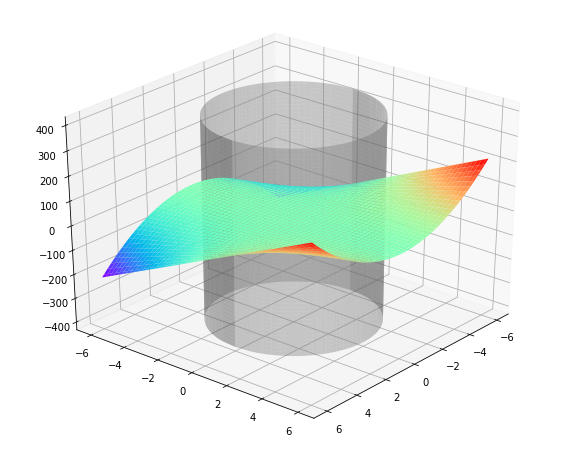

In [3]:
xn = np.linspace(-6, 6, 100)  
yn = np.linspace(-6, 6, 100) 
xxn, yyn = np.meshgrid(xn, yn)
XX = np.c_[xxn.ravel(), yyn.ravel()]
Z = np.array([f(xx) for xx in XX]).reshape(xxn.shape)

xn1 = np.linspace(-np.sqrt(16), np.sqrt(16), 100)  
zn1 = np.linspace(Z.min() - 200, Z.max() + 200, 100)
xxn1, zzn1 = np.meshgrid(xn1, zn1)
temp = np.where(16 - xxn1**2 < 0, 0., 16 - xxn1**2)
yyn1 = np.sqrt(temp)

fig = plt.figure(figsize=(10, 8))  
ax = fig.add_subplot(111, projection='3d')  
ax.plot_surface(xxn, yyn, Z, cmap=plt.get_cmap('rainbow'))  
ax.plot_surface(xxn1, yyn1, zzn1, color='gray', alpha=0.4)
ax.plot_surface(xxn1, -yyn1, zzn1, color='gray', alpha=0.4)
ax.view_init(azim=40)
plt.show()

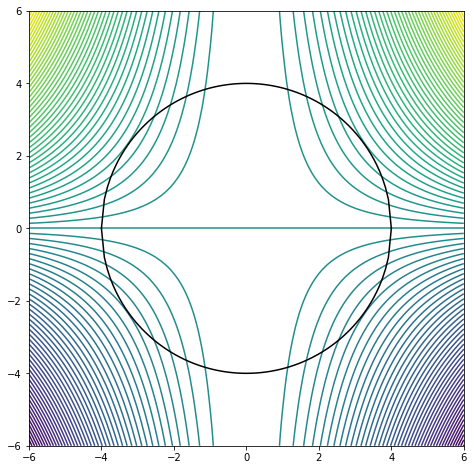

In [4]:
temp = np.where(16 - xn1**2 < 0, 0., 16 - xn1**2)
yn1 = np.sqrt(temp)

plt.figure(figsize=(8, 8))
plt.contour(xxn, yyn, Z, levels=100)
plt.plot(xn1, yn1, 'black')
plt.plot(xn1, -yn1, 'black')
plt.axis('square')
plt.show()

### 解析法

In [5]:
import sympy
sympy.init_printing()

In [6]:
x, y =sympy.symbols("x, y")
f_sym = x**2 * y
g_sym = x**2 + y**2 - 16
lamb = sympy.Symbol("lambda")
lagrangian = f_sym - lamb * g_sym
lagrangian

In [7]:
lagrangian_grad = [lagrangian.diff(i) for i in (x, y, lamb)]
res = sympy.solve(lagrangian_grad)
res

In [8]:
[(i, f_sym.subs(r)) for i, r in enumerate(res)]

In [9]:
# 最终结果
res[4], res[5]

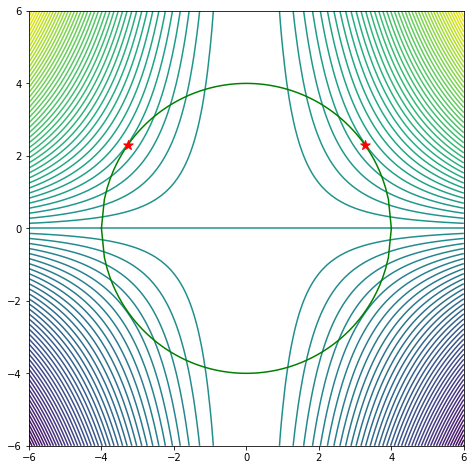

In [10]:
min1_x = float(sympy.N(list(res[4].values())[1]))
min1_y = float(sympy.N(list(res[4].values())[2]))
min1_f = float(sympy.N(f_sym.subs(res[4])))
min2_x = float(sympy.N(list(res[5].values())[1]))
min2_y = float(sympy.N(list(res[5].values())[2]))
min2_f = float(sympy.N(f_sym.subs(res[5])))

plt.figure(figsize=(8, 8))
plt.contour(xxn, yyn, Z, levels=100)
plt.plot(xn1, yn1, 'g')
plt.plot(xn1, -yn1, 'g')
plt.scatter(min1_x, min1_y, color='r', marker='*', s=100, zorder=3)
plt.scatter(min2_x, min2_y, color='r', marker='*', s=100, zorder=3)
plt.axis('square')
plt.show()

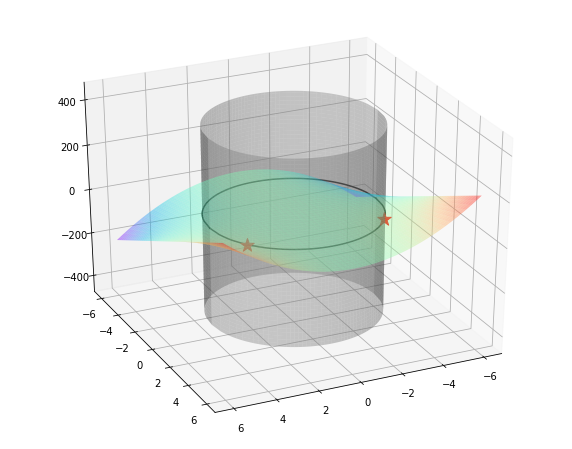

In [11]:
fig = plt.figure(figsize=(10, 8))  
ax = fig.add_subplot(111, projection='3d')  
ax.scatter(min1_x, min1_y, min1_f, color='r', marker='*', s=200)
ax.scatter(min2_x, min2_y, min2_f, color='r', marker='*', s=200)
ax.plot_surface(xxn, yyn, Z, cmap=plt.get_cmap('rainbow'), alpha=0.4)  
ax.plot_surface(xxn1, yyn1, zzn1, color='gray', alpha=0.4)
ax.plot_surface(xxn1, -yyn1, zzn1, color='gray', alpha=0.4)
ax.plot(xn1, yn1, min1_f, color='black')
ax.plot(xn1, -yn1, min1_f, color='black')

ax.view_init(azim=65)
plt.show()

### 数值法

In [12]:
from scipy import optimize
from autograd import grad

In [13]:
f = lambda X: (-1) * (X[0]**2 * X[1]) 
g = lambda X: X[0]**2 + X[1]**2 - 16
results1 = optimize.minimize(f, x0=[-1, 1.], method='trust-constr', 
                  constraints=[{"type": 'eq', "fun": g}])

E:\a-soft\Anaconda3\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


In [14]:
results1.x

array([-3.26598633,  2.30940107])

In [15]:
results2 = optimize.minimize(f, x0=[1, 1.], method='trust-constr', 
                  constraints=[{"type": 'eq', "fun": g}])

In [16]:
results2.x

array([3.26598633, 2.30940107])